In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [8]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [9]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [10]:
!pip install stopwords

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install wordCloud

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


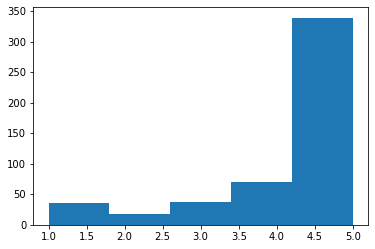

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [15]:
reviews = df
reviews.dropna(inplace=True) 
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [16]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [17]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


In [19]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [32]:
!pip install matplotlib wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [21]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

In [30]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [37]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.168,0.555,0.276,0.7926
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [38]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts p...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,0.168,0.555,0.276,0.7926


In [40]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts p...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,0.168,0.555,0.276,0.7926,Positive


Positive    457
Negative     43
Name: Sentiment, dtype: int64


<AxesSubplot:>

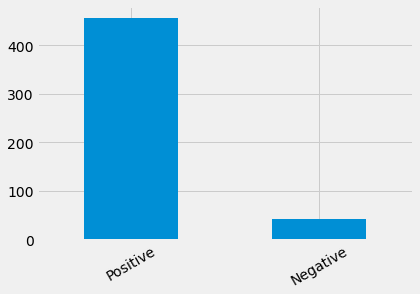

In [41]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)